# Machine Learning Lab 1


# Regression Analysis

## 4th March 2021

importing libraries

In [46]:
#wrangling
import pandas as pd

#numerical
import numpy as np

#model building
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import *
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

#plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
#reading data
data = pd.read_csv('Boston.csv')

In [48]:
#sample
data.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1,7.52601,0.0,18.10,0,0.713,6.417,98.3,2.1850,24,666,20.2,304.21,19.31,13.0
1,2,0.01360,75.0,4.00,0,0.410,5.888,47.6,7.3197,3,469,21.1,396.90,14.80,18.9
2,3,0.05789,12.5,6.07,0,0.409,5.878,21.4,6.4980,4,345,18.9,396.21,8.10,22.0
3,4,0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,5,398,18.7,386.40,12.34,21.2
4,5,2.14918,0.0,19.58,0,0.871,5.709,98.5,1.6232,5,403,14.7,261.95,15.79,19.4


certain feature description

In [4]:
print(np.max(data))

ID         406.0000
CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
MEDV        50.0000
dtype: float64


In [5]:
print(np.min(data))

ID           1.00000
CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
MEDV         5.00000
dtype: float64


In [6]:
data.describe()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,203.500000,3.827366,11.623153,11.316305,0.076355,0.557776,6.249941,69.139409,3.763943,9.770936,412.322660,18.529310,357.324286,12.984926,22.087192
std,117.346353,9.109085,24.402026,6.863974,0.265892,0.117979,0.684570,28.164409,2.150147,8.844849,169.960509,2.099372,90.671260,7.347552,8.854098
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,102.250000,0.079095,0.000000,5.190000,0.000000,0.453000,5.876250,45.625000,2.065625,4.000000,279.500000,17.400000,375.240000,7.205000,16.625000
50%,203.500000,0.263765,0.000000,9.900000,0.000000,0.538000,6.175000,78.600000,3.095750,5.000000,345.000000,19.100000,392.280000,11.490000,20.950000
75%,304.750000,4.191142,9.375000,18.100000,0.000000,0.624000,6.592250,94.375000,5.117675,24.000000,666.000000,20.200000,396.900000,17.300000,24.700000
max,406.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Plotting target variable

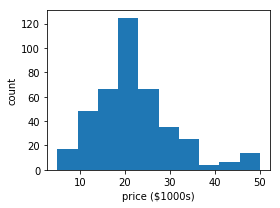

In [49]:
plt.figure(figsize=(4, 3))
plt.hist(data['MEDV'])
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.tight_layout()

Overview of all features together

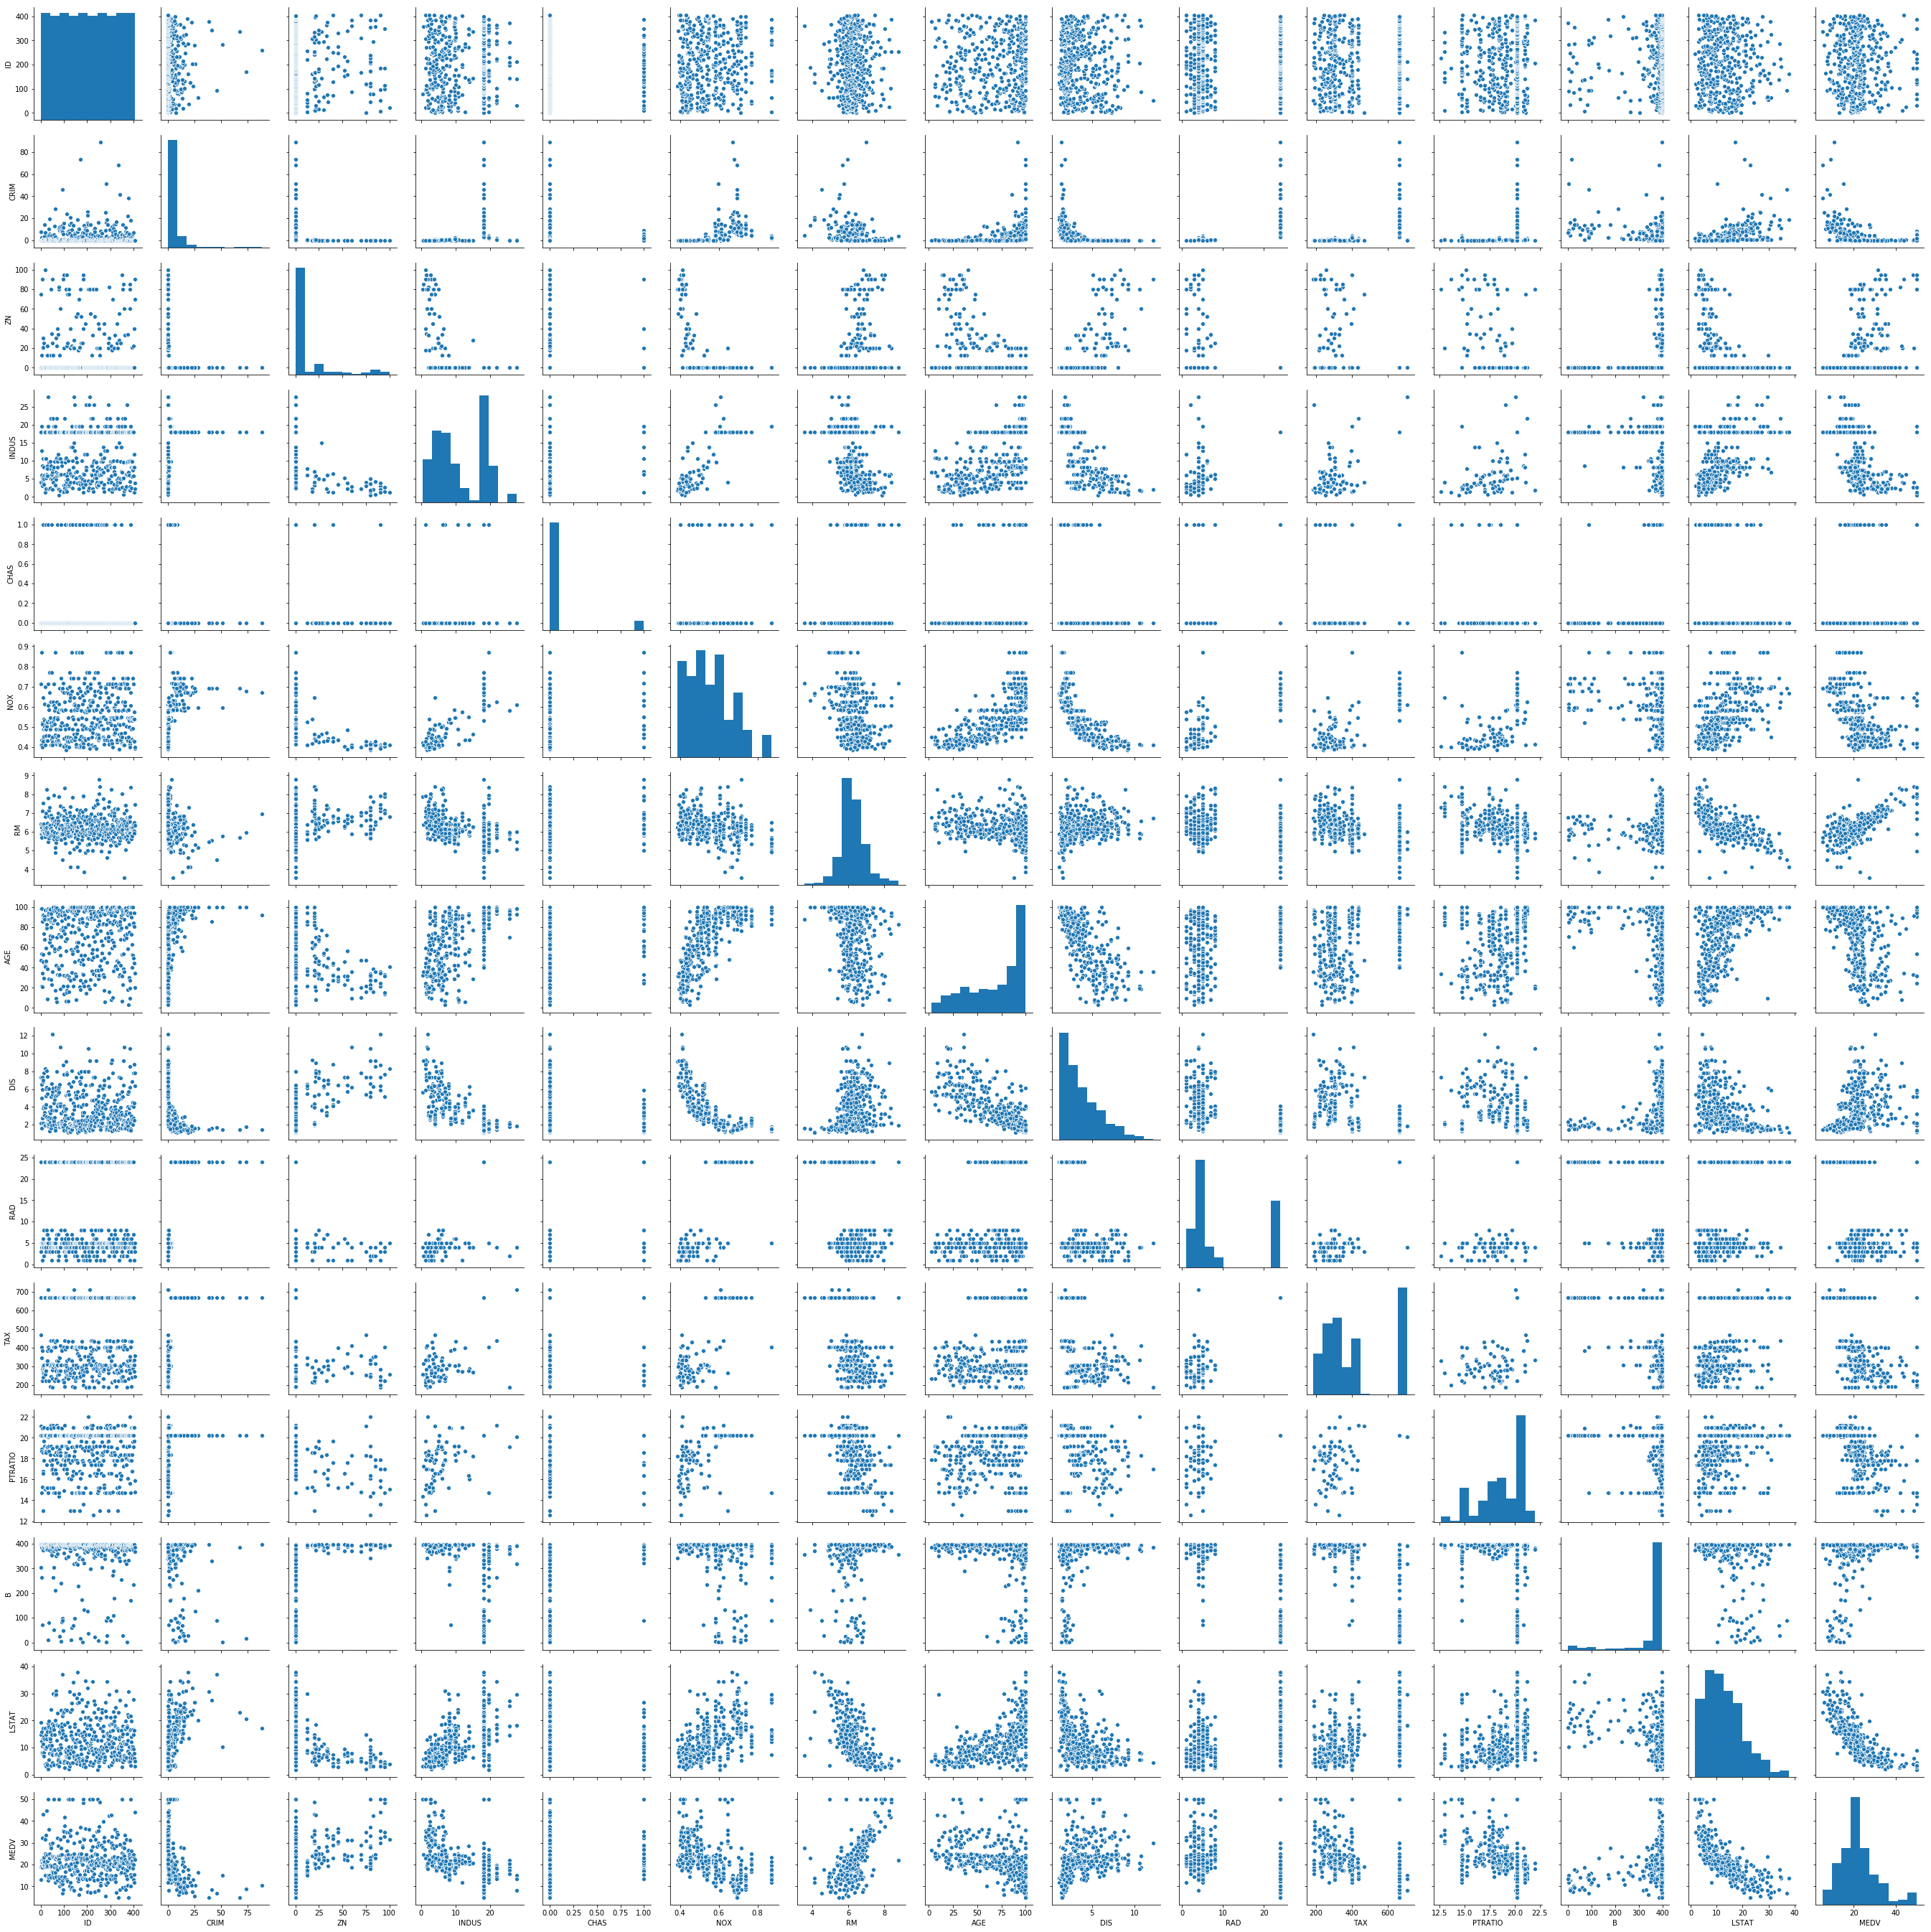

In [33]:
sns.pairplot(data)

## Model Building

In [50]:
#splitting
X_train, X_test, y_train, y_test = train_test_split(data, data['MEDV'],test_size=0.25, random_state=33)

In [51]:
#dropping
X_train = X_train.drop('MEDV',axis=1)
X_test = X_test.drop('MEDV',axis=1)

In [52]:
#fitting
reg = LinearRegression().fit(X_train, y_train)

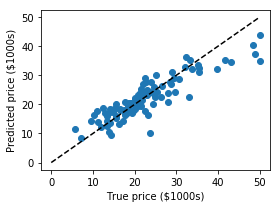

In [53]:
#predicting
predicted = reg.predict(X_test)
expected = y_test

#plotting
plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

In [54]:
#rms -> root mean square
print("RMS: %r " % np.sqrt(np.mean((predicted - expected) ** 2)))

RMS: 4.18647151393353 
